In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
income_df = pd.read_csv("SalaryData_train.csv")
income_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
income_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [23]:
income_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [24]:
income_df.shape

(30161, 14)

In [25]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [26]:
my_df=income_df

<AxesSubplot:>

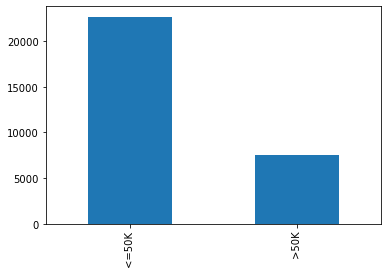

In [27]:
my_df['Salary'].value_counts().plot.bar()

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

<AxesSubplot:>

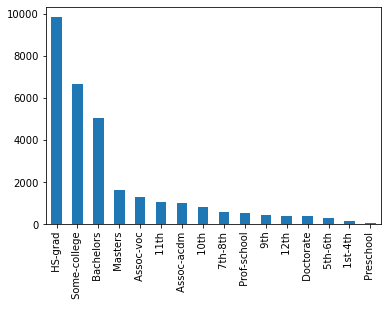

In [28]:
my_df['education'].value_counts().plot.bar()

<AxesSubplot:>

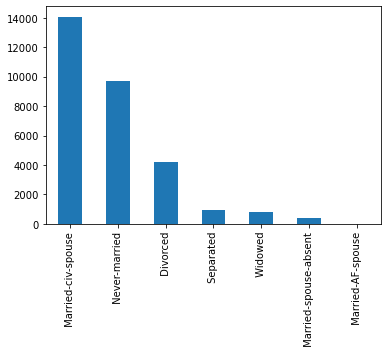

In [29]:
my_df['maritalstatus'].value_counts().plot.bar()

<AxesSubplot:>

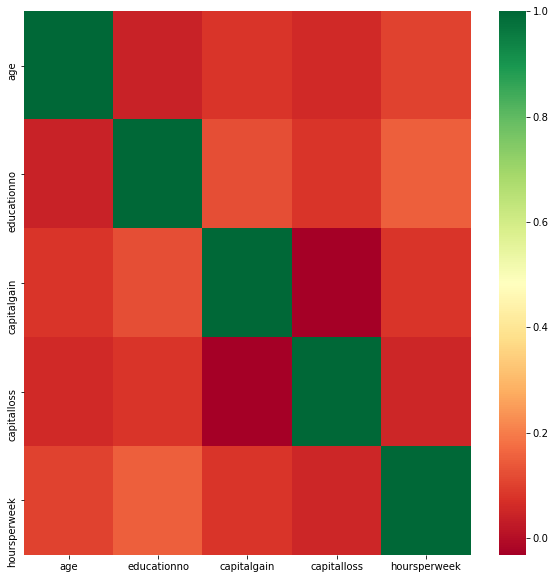

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(my_df.corr(),cmap="RdYlGn")

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [32]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [33]:
y = my_df["Salary"]
X = my_df.iloc[:,:-1]
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24128, 13), (24128,), (6033, 13), (6033,))

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10).mean()

0.832708538235825

In [39]:
y_pred=pipeline.predict(X_test)

In [40]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 80.25857782197912


array([[3913,  597],
       [ 594,  929]], dtype=int64)